<a href="https://colab.research.google.com/github/PSLMssGerd44/Works-/blob/main/Binary_classification_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calssificacion binaria predecir si las personas tienen o no una enfermedad del corazon.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/heart.csv')

In [ ]:
data.sample(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2,1
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Information

1. age: The person's age in years
2. sex: The person's sex (1 = male, 0 = female)
3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
5. chol: The person's cholesterol measurement in mg/dl
6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. thalach: The person's maximum heart rate achieved
9. exang: Exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot
11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12. ca: The number of major vessels (0-3)
13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. target: Heart disease (0 = no, 1 = yes)

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

In [ ]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [ ]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

1    165
0    138
Name: target, dtype: int64


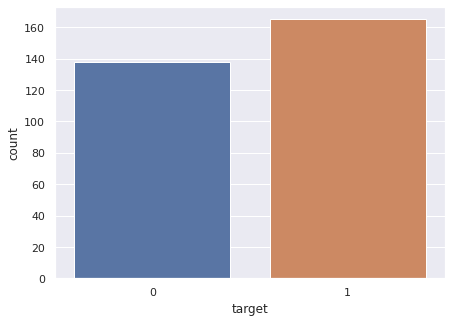

In [ ]:
print(data.target.value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x='target', data=data)

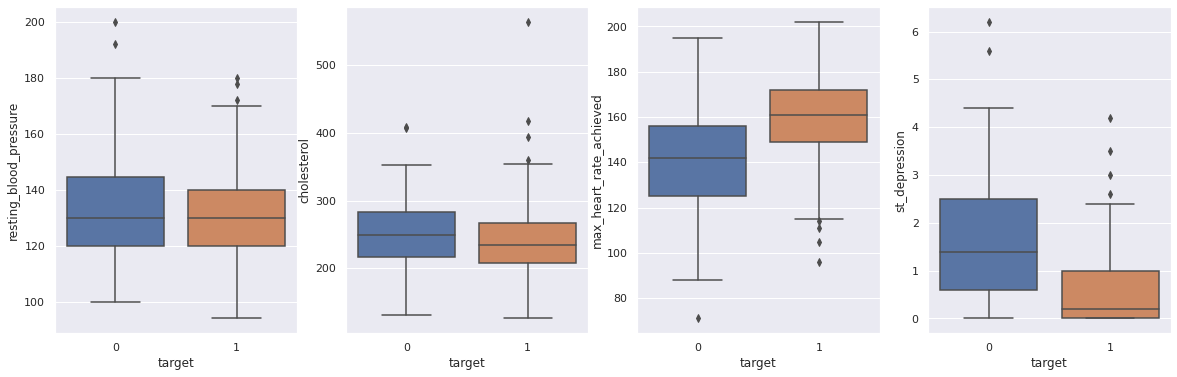

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(20,6))
sns.boxplot(x='target',y='resting_blood_pressure' ,data=data, ax=ax[0])
sns.boxplot(x='target',y='cholesterol' ,data=data,ax=ax[1])
sns.boxplot(x='target',y='max_heart_rate_achieved' ,data=data,ax=ax[2])
sns.boxplot(x='target',y='st_depression' ,data=data,ax=ax[3])

(14.5, -0.5)

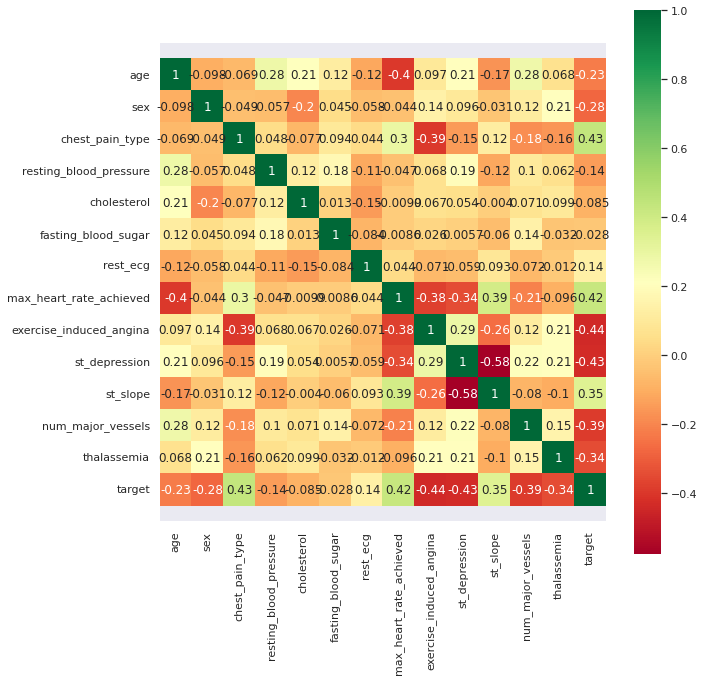

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', square=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)

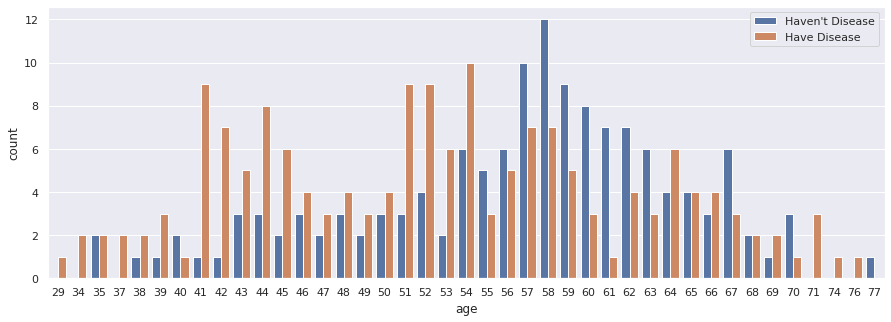

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='age', data=data, hue='target')
plt.legend(["Haven't Disease", "Have Disease"],loc='upper right')

In [ ]:
def plot_count_bar(feature):
  fig, ax = plt.subplots(1,2,figsize=(10,7))
  sns.countplot(x=feature, data=data, hue='target', ax=ax[0])
  ax[0].legend(["Haven't Disease", "Have Disease"],loc='best')
  sns.barplot(x=feature, y='target', data=data,ax=ax[1])

In [ ]:
data['sex'] = data['sex'].map({0:'female', 1:'male'})

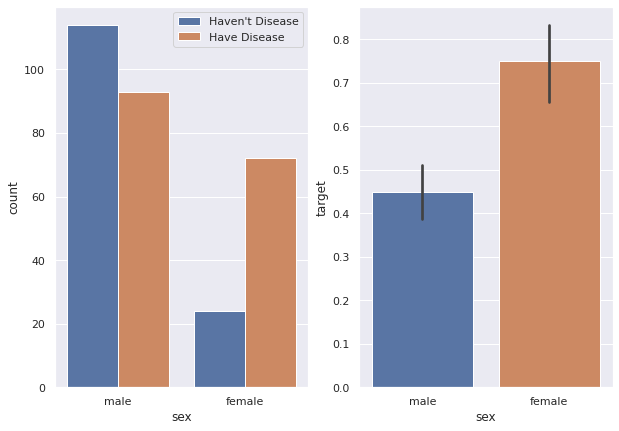

In [ ]:
plot_count_bar('sex')

In [ ]:
data['chest_pain_type'] = data['chest_pain_type'].map({0:'typical angina', 1:'atypical angina', 2:'non-anginal pain', 3:'asymptomatic'})

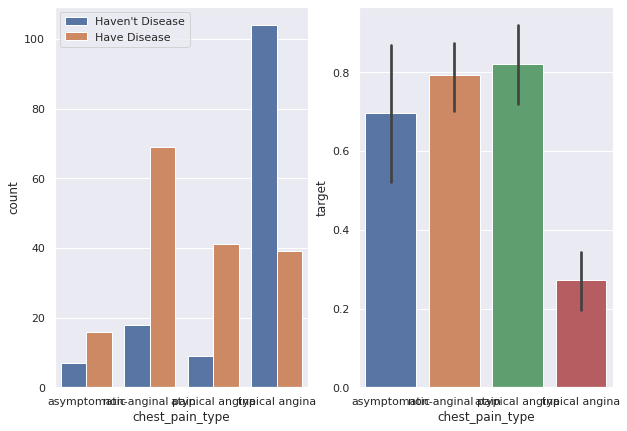

In [ ]:
plot_count_bar('chest_pain_type')

In [ ]:
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].map({0:'lower than 120mg/ml',1:'greater than 120mg/ml'})

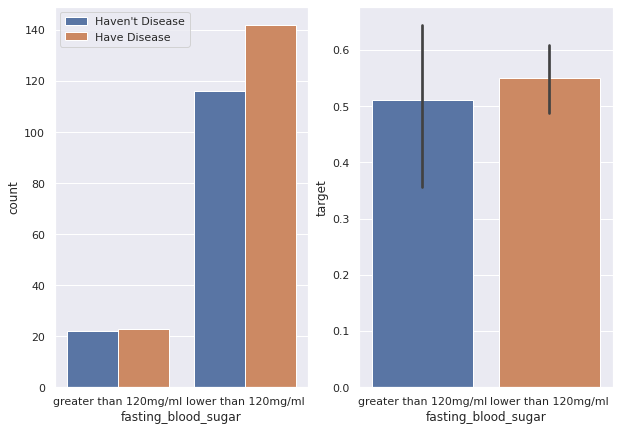

In [ ]:
plot_count_bar('fasting_blood_sugar')

In [ ]:
data['rest_ecg'] = data['rest_ecg'].map({0:'normal', 1 : 'ST-T abnormality', 2:'hypertrophy'})

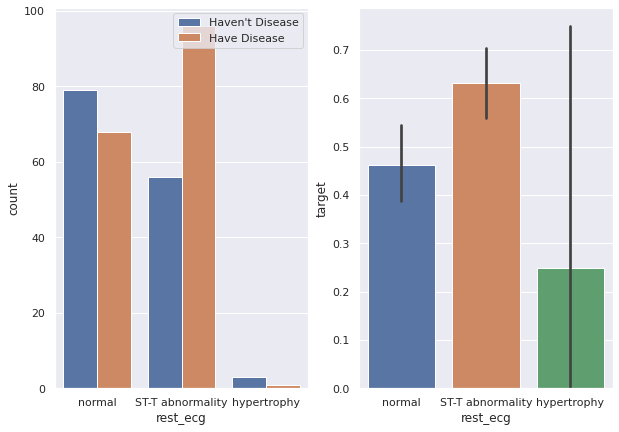

In [ ]:
plot_count_bar('rest_ecg')

In [ ]:
data['exercise_induced_angina'] = data['exercise_induced_angina'].map({0:'no', 1 : 'yes'})

In [ ]:
data['st_slope'] = data['st_slope'].map({0: 'upsloping',  1: 'flat', 2: 'downsloping'})

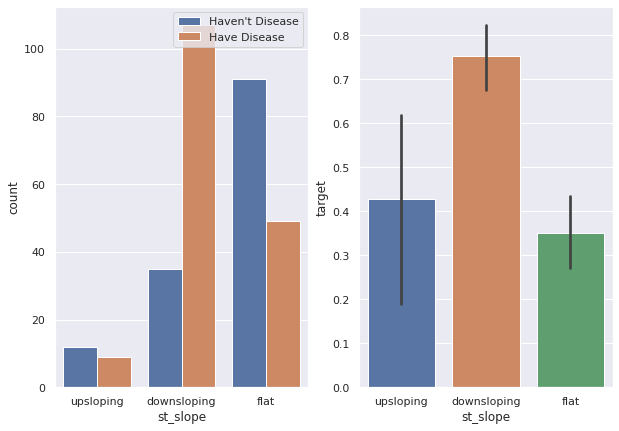

In [ ]:
plot_count_bar('st_slope')

In [ ]:
data['thalassemia'] = data['thalassemia'].map({1 :'normal', 2 : 'fixed defect', 3 :'reversable defect'})


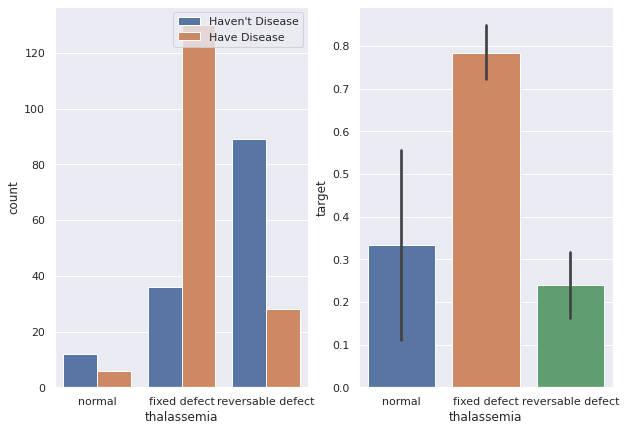

In [ ]:
plot_count_bar('thalassemia')

In [ ]:
data.sample(4)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
59,57,female,typical angina,128,303,lower than 120mg/ml,normal,159,no,0.0,downsloping,1,fixed defect,1
180,55,male,typical angina,132,353,lower than 120mg/ml,ST-T abnormality,132,yes,1.2,flat,1,reversable defect,0
6,56,female,atypical angina,140,294,lower than 120mg/ml,normal,153,no,1.3,flat,0,fixed defect,1
86,68,male,non-anginal pain,118,277,lower than 120mg/ml,ST-T abnormality,151,no,1.0,downsloping,1,reversable defect,1


In [ ]:
X=data.iloc[:,:-1]
y=data['target']
X=pd.get_dummies(X)

In [ ]:
X.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,...,rest_ecg_hypertrophy,rest_ecg_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,0,1,1,0,...,0,1,1,0,0,0,1,0,1,0
1,37,130,250,187,3.5,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
2,41,130,204,172,1.4,0,1,0,0,1,...,0,1,1,0,1,0,0,1,0,0
3,56,120,236,178,0.8,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(242, 25)

In [ ]:
model = Pipeline((
    ('scale', StandardScaler()), ('log_reg',LogisticRegression(C=10, solver='lbfgs', n_jobs=-1, fit_intercept=True))
))

In [ ]:
model.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('log_reg', LogisticRegression(C=10, n_jobs=-1))])

In [ ]:
y_fit=model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_fit))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



(2.5, -0.5)

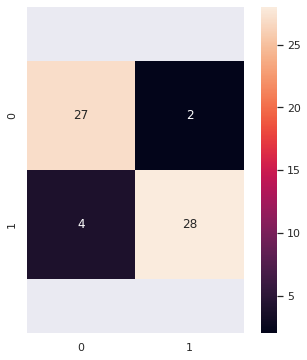

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_fit), annot=True, square=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)

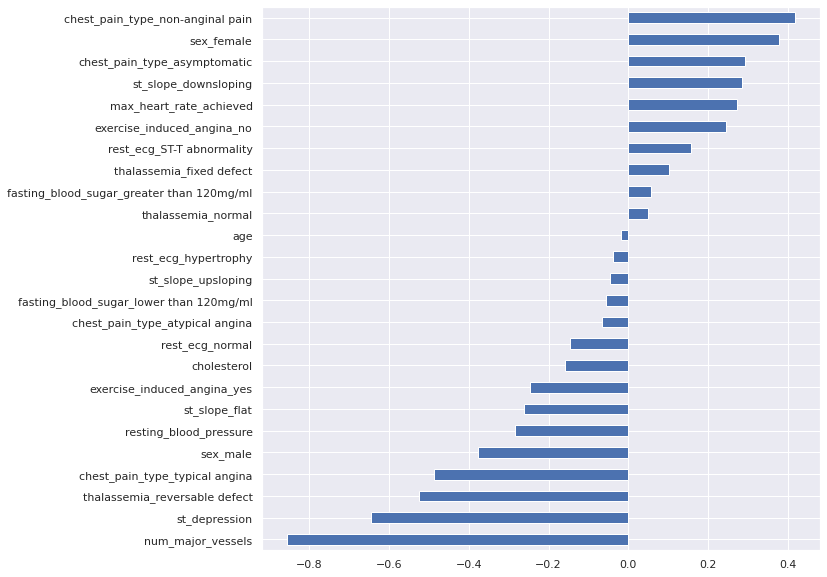

In [ ]:
plt.figure(figsize=(10,10))
pd.Series((model[1].coef_[0]), index=X_train.columns).sort_values().plot(kind='barh')

In [ ]:
grid_params = {
    'log_reg__C':np.linspace(1,100,5),
    'log_reg__fit_intercept': [True,False]
}

In [ ]:
scale = StandardScaler()

In [ ]:
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential([
     keras.layers.Dense(5, activation='relu', input_shape = X_train.shape[1:]),    
     keras.layers.Dense(5, activation='relu'), 
     keras.layers.Dense(1 , activation='sigmoid')   
                             
])

In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled,y_train, epochs=50, validation_split=0.2)

Epoch 1/50
7/7 [==============================] - 1s 104ms/step - loss: 0.7653 - accuracy: 0.4819 - val_loss: 0.7267 - val_accuracy: 0.5510
Epoch 2/50
7/7 [==============================] - 0s 15ms/step - loss: 0.7546 - accuracy: 0.5181 - val_loss: 0.7126 - val_accuracy: 0.5510
Epoch 3/50
7/7 [==============================] - 0s 16ms/step - loss: 0.7357 - accuracy: 0.5337 - val_loss: 0.7076 - val_accuracy: 0.5510
Epoch 4/50
7/7 [==============================] - 0s 20ms/step - loss: 0.7279 - accuracy: 0.5389 - val_loss: 0.7011 - val_accuracy: 0.5714
Epoch 5/50
7/7 [==============================] - 0s 18ms/step - loss: 0.7201 - accuracy: 0.5544 - val_loss: 0.6925 - val_accuracy: 0.5918
Epoch 6/50
7/7 [==============================] - 0s 18ms/step - loss: 0.7094 - accuracy: 0.5492 - val_loss: 0.6853 - val_accuracy: 0.6122
Epoch 7/50
7/7 [==============================] - 0s 14ms/step - loss: 0.7009 - accuracy: 0.5648 - val_loss: 0.6802 - val_accuracy: 0.6122
Epoch 8/50
7/7 [==========

In [ ]:
def build_model(n_neurons=5,input_shape=(25,)):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(n_neurons, activation='relu', input_shape=input_shape))
  model.add(keras.layers.Dense(n_neurons, activation='relu' ))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=100, validation_split=0.2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [ ]:
def build_model(n_hidden=1, n_neurons=5,input_shape=(25,)):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(n_neurons, activation='relu', input_shape=input_shape))
  for i in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=50, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [ ]:
params = {
    'ann__n_hidden':[0,1,2,3],
    'ann__n_neurons':np.arange(0,15),
    'ann__batch_size':[10,15,20]
}

In [ ]:
rnd_search = RandomizedSearchCV(model, params, n_iter=50, n_jobs=-1, cv=3, scoring='accuracy')